In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
# Load dataset
file_path = "/content/UniversalBank.csv"
data = pd.read_csv(file_path)

In [ ]:
data.head(100)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38,12,48,95617,4,0.2,3,0,0,0,0,1,0
96,97,41,15,80,95014,1,5.2,1,0,0,0,0,0,0
97,98,54,28,161,92121,1,2.9,1,0,0,0,0,1,0
98,99,49,23,94,92374,1,0.3,1,0,0,0,0,1,0


In [ ]:
# Remove unnecessary columns
data.drop(['ID', 'ZIP Code'], axis=1, inplace=True)


In [ ]:
# Convert categorical variables to category type
categorical_features = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
data[categorical_features] = data[categorical_features].astype('category')


In [ ]:
# Split data into features and response
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan'].astype('category')

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [ ]:
# Preprocessing: Standardize numeric data and one-hot encode categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [ ]:
# SVM with linear kernel
linear_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=10,probability=True))
])


In [ ]:
# Train the model
linear_svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['Education',
                                                   'Securities Account',
                                                   'CD Account', 'Online',
                                                   'CreditCard'])])),
                ('classifier', SVC(C=10, kernel='linear', probability=True))])

In [ ]:
# Predict on train and test sets
y_train_pred = linear_svm_pipeline.predict(X_train)
y_test_pred = linear_svm_pipeline.predict(X_test)


In [ ]:
# Evaluate the model
print("Linear Kernel - Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Linear Kernel - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Linear Kernel - Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

Linear Kernel - Train Confusion Matrix:
[[3149   15]
 [ 119  217]]
Linear Kernel - Test Confusion Matrix:
[[1342   14]
 [  49   95]]
Linear Kernel - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.87      0.66      0.75       144

    accuracy                           0.96      1500
   macro avg       0.92      0.82      0.86      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
# SVM with RBF kernel
rbf_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=10, gamma=0.1,probability=True))
])


In [ ]:
#  Train the model
rbf_svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['Education',
                                                   'Securities Account',
                                                   'CD Account', 'Online',
                                                   'CreditCard'])])),
                ('classifier', SVC(C=10, gamma=0.1, probability=True))])

In [ ]:
# Predict on train and test sets
y_train_pred_rbf = rbf_svm_pipeline.predict(X_train)
y_test_pred_rbf = rbf_svm_pipeline.predict(X_test)


In [ ]:
# Evaluate the model
print("RBF Kernel - Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rbf))
print("RBF Kernel - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rbf))
print("RBF Kernel - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_rbf))

RBF Kernel - Train Confusion Matrix:
[[3161    3]
 [  17  319]]
RBF Kernel - Test Confusion Matrix:
[[1353    3]
 [  22  122]]
RBF Kernel - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.98      0.85      0.91       144

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
# Hyperparameter tuning using Grid Search for RBF kernel
param_grid = {'classifier__C': [2, 4], 'classifier__gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(rbf_svm_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Securities '
                                                                          'Account',
                                                                          'CD '
                                                                          'Account',
                                                                          'Online',
                                                                          'CreditCard'])])),
                                       ('classifier',
                                        SVC(C=10, gamma=0.1,
                                            probability=True))]),
             param_grid={'classifier__C': [2, 4],
                         'classifier__gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters found:  {'classifier__C': 4, 'classifier__gamma': 0.1}


In [ ]:
# Predict with tuned model
y_test_pred_tuned = best_model.predict(X_test)

In [ ]:
# Evaluate tuned model
print("Tuned RBF Kernel - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tuned))
print("Tuned RBF Kernel - Classification Report (Test):")
print(classification_report(y_test, y_test_pred_tuned))

Tuned RBF Kernel - Test Confusion Matrix:
[[1355    1]
 [  22  122]]
Tuned RBF Kernel - Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.99      0.85      0.91       144

    accuracy                           0.98      1500
   macro avg       0.99      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



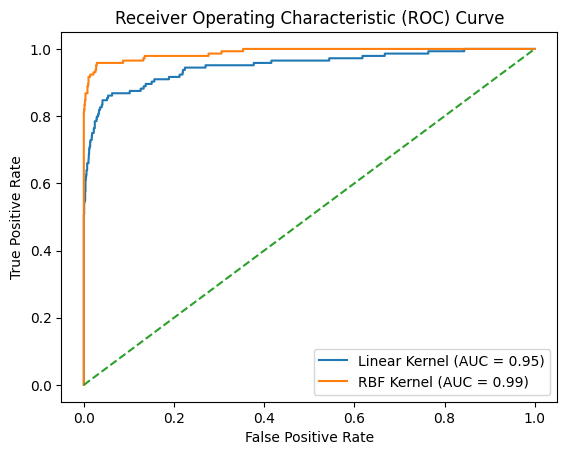

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve for Linear Kernel Model
fpr, tpr, thresholds = roc_curve(y_test, linear_svm_pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Linear Kernel (AUC = {roc_auc:.2f})')

# ROC Curve for RBF Kernel Model
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, rbf_svm_pipeline.predict_proba(X_test)[:, 1])
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF Kernel (AUC = {roc_auc_rbf:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
